In [18]:
%pylab inline
sys.path.append('/home/photon/code/Qfunction')
import Qfunction as Qfunc
import scipy.stats as sp
from matplotlib import rc
from matplotlib.ticker import MultipleLocator

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [19]:
vacuum_focal_raw = np.load("/home/photon/data/07-03-2014/13-37-57_raw.npz")
focal_raw = np.load("/home/photon/data/07-03-2014/13-49-56_raw.npz")
#unblocked_raw = np.load("/home/photon/data/06-26-2014/13-13-26_raw.npz")
#vacuum_unblocked_raw = np.load("/home/photon/data/06-26-2014/13-11-12_raw.npz")

In [20]:
#unblocked_vac_data = vacuum_unblocked_raw['dataOut']
#unblocked_data = unblocked_raw['dataOut']
#unblocked_ncount = unblocked_raw['ncount']
focal_vac_data = vacuum_focal_raw['dataOut']
focal_data = focal_raw['dataOut']
focal_ncount = focal_raw['ncount']

In [21]:
#Kp_vacU = np.average(unblocked_vac_data,axis=(1,2))
#scaled_vcU = np.sqrt(2.0/unblocked_ncount)*(unblocked_data - Kp_vacU.reshape(600,1,1))
Kp_vacF = np.average(focal_vac_data,axis=(1,2))
scaled_vcF = np.sqrt(2.0/focal_ncount)*(focal_data - Kp_vacF.reshape(600,1,1))

In [22]:
modeA = 185
outputF = scaled_vcF[modeA,:,:].flatten()  # Choose the mode to analyze
#outputU = scaled_vcU[modeA,:,:].flatten()  # Choose the mode to analyze
#y_realF = np.real(outputF)
#y_imagF = np.imag(outputF)
#y_realU = np.real(outputU)
#y_imagU = np.imag(outputU)
#x_realF = []
#x_realU = []
#x_imagF = []
#x_imagU = []
#x_absF = []
#x_absU = []
outputF = []
#outputU = []
#magnitudeF = []
#magnitudeU = []
modes = range(0,300)
theta = []
#single_mode_vacuumF = []
#single_mode_vacuumU = []
#x_vacF = []
#x_vacU = []
photon_numberF = []
std_devF = []
#photon_numberU = []
    
for i in modes:
    x = np.real(scaled_vcF[i,:,:].flatten('F'))
    y = np.imag(scaled_vcF[i,:,:].flatten('F'))
    outputF.append(scaled_vcF[i,:,:].flatten())
    #outputU.append(scaled_vcU[i,:,:].flatten())
    #x_realF.append(np.real(outputF[i]))
    #x_realU.append(np.real(outputU[i])) 
    #x_imagF.append(np.imag(outputF[i]))
    #x_imagU.append(np.imag(outputU[i]))
    #x_absF.append(np.abs(outputF[i]))
    #x_absU.append(np.abs(outputU[i]))
    #magnitudeF.append(np.average(x_absF[i]))
    #magnitudeU.append(np.average(x_absU[i]))
    theta.append(modes[i] * (780e-9)/(600*20e-6)*1000)
    #single_mode_vacuumU.append(unblocked_vac_data[i,:,:].flatten())
    #x_vacU.append(np.real(single_mode_vacuumU[i]))
    photon_numberF.append(0.5*(np.average(np.abs(outputF[i])))**2)
    std_devF.append(Qfunc.std_n_raw(x,y))
    #photon_numberU.append(0.5*(np.average(np.abs(outputU[i])))**2)

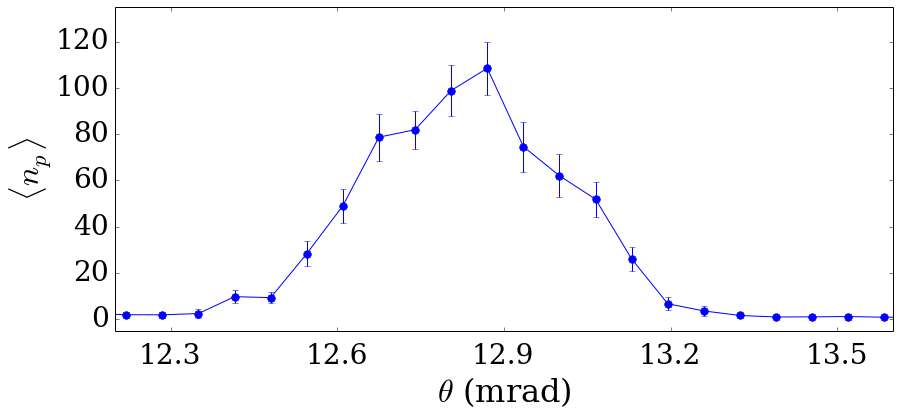

In [23]:
rc('font',size=28)
rc('font',family='serif')
rc('axes',labelsize=32)
rc('ytick.major', pad = 8)
figure(figsize=(13.5,6))
subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)
errorbar(theta[180:220], photon_numberF[180:220],yerr=std_devF[180:220],fmt=".-",markersize=15)
#plot(theta[161:200], photon_numberU[161:200] ,".-",markersize=15)
xlabel("$\\theta$ (mrad)")
ylabel("$\\langle n_p \\rangle$")
xlim((12.2, 13.6))
ylim((-5,135))
axes = gca()
axes.xaxis.set_major_locator(MultipleLocator(0.3))
savefig("/home/photon/Dropbox/figure4.pdf")